In [1]:
#import python packages for data analysis
import pandas as pd, numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling

In [2]:
#read source file into iPython Env.
dflm=pd.read_excel('dflowtomid.xlsx')
pd.options.display.float_format ='{:,.0f}'.format
dflm['Dollar Threshold ID'] = dflm['Dollar Threshold ID'].astype('category')

# The first section illustrates my thought process for leveraging industry tools and OliveAI experts related to the EDA (exploratory data analysis) process. In prior roles I was responsible for standardizing, automating and scaling the EDA process for existing and new clients. 

#The enclosed EDA report includes the following key sections:
* descriptive statistics including ranges
* general overview of the dataset (shape of the data)
* histograms for each variable
* warnings if a particular variable has a unique distribution such as uniform versus normal
* correlations
* outliers (extreme values)
* missing values

### To access the report please scroll down to the profile report. I also included the profile report as a separate html file.


In [3]:
pandas_profiling.ProfileReport(dflm)

## Although the profile report highlights missing data I am also comfortable generating python code to automate identifying missing values for each column in a dataframe.

In [4]:
total = dflm.isnull().sum().sort_values(ascending=False)
total

revenues               9
agegroup               5
age                    5
payor                  4
Patient Type           0
Dollar Threshold ID    0
Dollar Thresholds      0
dtype: int64

Summarize the data with a pivot tables.

In [5]:
dflm.pivot_table(index=['Dollar Threshold ID','Dollar Thresholds'],values='revenues',margins=True,aggfunc=['sum','count'])

,,sum,count
,,revenues,revenues
Dollar Threshold ID,Dollar Thresholds,,
2,0-500,"103,061",401
3,"501-1,000","3,850",5
4,"1,001-2,500","47,712",27
5,"2,501-5,000","247,266",65
6,"5,001-10,000","850,037",111
7,"10,001-15,000","1,397,129",110
8,"15,001-20,000","2,142,309",124
9,"20,001-25,000","2,859,188",128


In [6]:
dflm.pivot_table(index=['Patient Type'],values='revenues',margins=True,aggfunc=['sum','count'])

,sum,count
,revenues,revenues
Patient Type,,
ER,"43,173",84
IP,"4,678,884",224
OP,"3,087,979",666
All,"7,810,036",974


In [7]:
import altair as alt
dflm=pd.read_excel('dflowtomid.xlsx')

alt.Chart(dflm).mark_bar().encode(
    x=alt.X('Dollar Thresholds', title='Count of Dollar Thresholds', sort=alt.EncodingSortField(
        field='Dollar Thresholds',
        op='count',
        order='descending')),
    y='count(Dollar Thresholds)',
    color='agegroup:N'
)

alt.Chart(...)

In [8]:
import altair as alt
dflm=pd.read_excel('dflowtomid.xlsx')

alt.Chart(dflm).mark_bar().encode(
    x=alt.X('Patient Type', title='Revenues by Patient Type', sort=alt.EncodingSortField(
        field='revenues',
        op='sum',
        order='descending')),
    y='sum(revenues)',
    color='agegroup:N'
)

alt.Chart(...)

In [9]:
import altair as alt
dflm=pd.read_excel('dflowtomid.xlsx')

alt.Chart(dflm).mark_bar().encode(
    x=alt.X('Patient Type', title='Revenues by Patient Type', sort=alt.EncodingSortField(
        field='revenues',
        op='count',
        order='descending')),
    y='count(revenues)',
    color='agegroup:N'
)

alt.Chart(...)

Pivot data by aging categories.The majority of accounts are 151+.

In [10]:
dflm.pivot_table(index=['agegroup'],values='revenues',margins=True,aggfunc=['sum','count','mean'])

,sum,count,mean
,revenues,revenues,revenues
agegroup,,,
1G 0-30,"373,191",44,"8,482"
2G 31-60,"255,973",36,"7,110"
3G 61-90,"299,379",36,"8,316"
4G 91-120,"330,533",46,"7,186"
5G 121-150,"225,314",34,"6,627"
6 G151+,"6,324,350",773,"8,182"
All,"7,808,740",969,"8,059"


Create a pairs plot with seaborn.

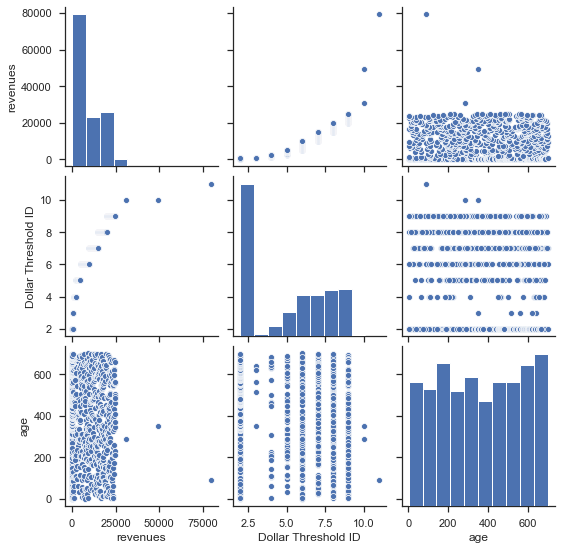

In [11]:
#create pair plots to better understand the data
'''
This basic pair plots leverages seaborn's statistical graphing package.
'''

sns.set(style="ticks", color_codes=True)
dflm= sns.pairplot(dflm)
plt.show()

Leverage altair to create a scatter plot of revenues by age groups.
The scatter plot clearly highlights that the majority of accounts are aged and under $20k.

In [12]:
#Leverage altair to create a scatter plot of revenues by account ageing categories.
# The scatter plot clearly highlights that the majority of accounts are aged and under $20k.

import altair as alt
dflm=pd.read_excel('dflowtomid.xlsx')
chart = alt.Chart(dflm).mark_circle().encode(
    x='age',
    y='revenues',
    color='agegroup',
)
chart

alt.Chart(...)

The graph below is also a pair plot, but with a different graph package. These graphs are interactive.
Use your cursor to move points on one of the graphs.

In [13]:
#The graph below is also a pair plot, but with a different graph package. These graphs are interactive.
#Use your cursor to move points on one of the graphs.

alt.Chart(dflm).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='agegroup:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['revenues', 'age'],
    column=['age', 'revenues']
).interactive()

alt.RepeatChart(...)

A strip plot is a great way to visualize all of the data points by segments.
As you can see below this graph highlights 151+ as the largest category. Several low dollar accounts and some high dollar accou

In [14]:

stripplot =  alt.Chart(dflm, width=80).mark_circle(size=10).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    y=alt.Y('revenues:Q'),
    color=alt.Color('agegroup:N', legend=None),
    column=alt.Column(
        'agegroup:N',
        header=alt.Header(
            labelAngle=-90,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='right',
            labelPadding=3,
        ),
   ),
).transform_calculate(
    #Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

stripplot

alt.Chart(...)

In [15]:
dflm=pd.read_excel('dflowtomid.xlsx')

stripplot =  alt.Chart(dflm, width=80).mark_circle(size=10).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale()
    ),
    y=alt.Y('revenues:Q'),
    color=alt.Color('Dollar Thresholds:N', legend=None),
    column=alt.Column(
        'Dollar Thresholds:N',sort=alt.EncodingSortField(
        field='Dollar Threshold ID',
        order='ascending'),
        header=alt.Header(
            labelAngle=-90,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='right',
            labelPadding=3,
        ),
   ),
).transform_calculate(
    #Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).properties(width=75)

stripplot

alt.Chart(...)

0-500 has the highest count\
20k-25k= largest revenue segment

In [16]:
dflm.groupby(['Dollar Threshold ID','Dollar Thresholds'])['revenues'].agg(['sum','count']).sort_values(by=['sum','count'], ascending=False)

,,sum,count
Dollar Threshold ID,Dollar Thresholds,,
9,"20,001-25,000","2,859,188",128
8,"15,001-20,000","2,142,309",124
7,"10,001-15,000","1,397,129",110
6,"5,001-10,000","850,037",111
5,"2,501-5,000","247,266",65
2,0-500,"103,061",401
10,"25,001-50,000","80,016",2
11,"50,001-100,000","79,468",1
4,"1,001-2,500","47,712",27


In [17]:
#Brushing Scatter Plot to show data on a table
#new df low to mid range dollars

dflm=pd.read_excel('dflowtomid.xlsx')
pd.options.display.float_format ='{:,.0f}'.format


import altair as alt
source = dflm
# Brush for selection
brush = alt.selection(type='interval')

# Scatter Plot
points = alt.Chart(source).mark_point().encode(
    x='age:Q',
    y='revenues:Q',
    color=alt.condition(brush, 'Patient Type:N', alt.value('grey'))
).add_selection(brush)

# Base chart for data tables
ranked_text = alt.Chart(source).mark_text().encode(
    y=alt.Y('row_number:O',axis=None)
).transform_window(
    row_number='row_number()'
).transform_filter(
    brush
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank<20
)

# Data Tables
age = ranked_text.encode(text='age:N').properties(title='Acct Age')
revenues = ranked_text.encode(text='revenues:N').properties(title='Revenues')
payor = ranked_text.encode(text='payor:N').properties(title='Payor')
patient_type = ranked_text.encode(text='Patient Type:N').properties(title='Patiet Type')
text = alt.hconcat(age, revenues, payor, patient_type) # Combine data tables

# Build chart
alt.hconcat(
    points,
    text
).resolve_legend(
    color="independent"
)

alt.HConcatChart(...)

In [18]:
#new df low to mid range dollars

dflm=pd.read_excel('dflowtomid.xlsx')
pd.options.display.float_format ='{:,.0f}'.format


import altair as alt
source = dflm

alt.Chart(source).mark_circle().encode(
    alt.X('age:Q', bin=True),
    alt.Y('revenues:Q', bin=True),
    size='count()'
)


alt.Chart(...)

In [19]:
#new df low to mid range dollars
dflm=pd.read_excel('dflowtomid.xlsx')
pd.options.display.float_format ='{:,.0f}'.format
import altair as alt
source = dflm
# Configure the options common to all layers
brush = alt.selection(type='interval')
base = alt.Chart(source).add_selection(brush)
# Configure the points
points = base.mark_point().encode(
    x=alt.X('age', title=''),
    y=alt.Y('revenues', title=''),
    color=alt.condition(brush, 'Patient Type', alt.value('grey'))
).properties(height=500)
# Configure the ticks
tick_axis = alt.Axis(labels=False, domain=False, ticks=False)
x_ticks = base.mark_tick().encode(
    alt.X('age', axis=tick_axis),
    alt.Y('Patient Type', title='', axis=tick_axis),
    color=alt.condition(brush, 'Patient Type', alt.value('lightgrey'))
)
y_ticks = base.mark_tick().encode(
    alt.X('Patient Type', title='', axis=tick_axis),
    alt.Y('revenues', axis=tick_axis),
    color=alt.condition(brush, 'Patient Type', alt.value('lightgrey'))
).properties(height=500)
# Build the chart
y_ticks | (points & x_ticks)

alt.HConcatChart(...)

In [20]:
import altair as alt
df_low=pd.read_excel('dflowtomid.xlsx')
source = dflm
alt.Chart(source).mark_point().encode(
    x='age:Q',
    y='revenues:Q',
    row='Patient Type:N'
).properties(height=200)

alt.Chart(...)

In [21]:
import altair as alt
dflm=pd.read_excel('dflowtomid.xlsx')
pd.options.display.float_format ='{:,.0f}'.format

source = dflm

alt.Chart(source).mark_boxplot(size=40).encode(
    y='revenues:Q',
    x='agegroup:N',
    #color='Patient Type:N'
    
).properties(
    height=800,
    width=300)


alt.Chart(...)

In [22]:
import altair as alt
df_low=pd.read_excel('dflowtomid.xlsx')
pd.options.display.float_format ='{:,.0f}'.format

source = dflm

alt.Chart(source).mark_boxplot(size=40).encode(
    x='revenues:Q',
    y='Patient Type:N',
    color='agegroup',
).properties(
    width=800,
    height=200)

alt.Chart(...)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


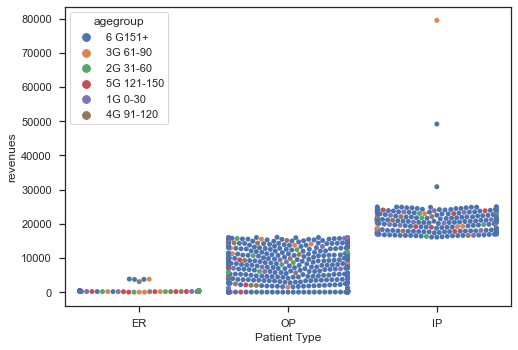

In [23]:
sns.swarmplot(x="Patient Type", y="revenues", hue='agegroup', data=dflm)